In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True) 

Mounted at /content/drive


In [ ]:
cd drive/MyDrive 

/content/drive/MyDrive


In [ ]:
pip install -U tensorflow-addons

     |████████████████████████████████| 706kB 8.4MB/s 


In [ ]:
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
tf.config.run_functions_eagerly(True)
import keras
import keras.utils
from keras import backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image

from time import time
from time import sleep
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
# import necessary building blocks
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU
import numpy as np
from keras.models import *
from keras.layers import Input,Conv2D,BatchNormalization,Activation,Lambda,Subtract,concatenate,Add,merge,GlobalAveragePooling1D
import keras.backend as K
from keras.models import load_model

import pandas as pd
import pprint


# fit model
import tensorflow_addons as tfa
import keras.utils
from keras.callbacks import ModelCheckpoint

from numpy import loadtxt


2.4.1
2.4.3


In [ ]:
cd Test

/content/drive/MyDrive/Test


In [ ]:

# -*- coding: utf-8 -*-
"""
Created on Fri Feb  9 16:02:33 2018

@author: clausmichele
"""

"""
import os
import numpy as np
import cv2
import glob

 
def addnoise():
  
  src_dir='./McMaster'
  save_dir='./'
  
  
  filepaths = glob.glob(src_dir + '/*.png')
  print(filepaths[:10])
  def sortKeyFunc(s):
    return os.path.basename(s)[:-4]
    
 
  filepaths.sort(key=sortKeyFunc)
  
  
  print("[*] Reading train files...")  

        

  print("[*] Applying noise...")
  sig = np.linspace(0,50,len(filepaths))
  np.random.shuffle(sig)


  for i in range(len(filepaths)):
        print(i,'entered')
        image = cv2.imread(filepaths[i])
        image = cv2.resize(image,(180,180), interpolation = cv2.INTER_CUBIC)
        row,col,ch = image.shape
        mean = 0
        sigma = sig[i]
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        noisy = np.clip(noisy, 0, 255)
        noisy = noisy.astype('uint8')
        
        cv2.imwrite(os.path.join(save_dir, "type3test/noisy/%04d.png" %i), noisy)
        
        
  
  print("[*] Noisy and original images saved")
addnoise()
"""

'\nimport os\nimport numpy as np\nimport cv2\nimport glob\n\n \ndef addnoise():\n  \n  src_dir=\'./McMaster\'\n  save_dir=\'./\'\n  \n  \n  filepaths = glob.glob(src_dir + \'/*.png\')\n  print(filepaths[:10])\n  def sortKeyFunc(s):\n    return os.path.basename(s)[:-4]\n    \n \n  filepaths.sort(key=sortKeyFunc)\n  \n  \n  print("[*] Reading train files...")  \n\n        \n\n  print("[*] Applying noise...")\n  sig = np.linspace(0,50,len(filepaths))\n  np.random.shuffle(sig)\n\n\n  for i in range(len(filepaths)):\n        print(i,\'entered\')\n        image = cv2.imread(filepaths[i])\n        image = cv2.resize(image,(180,180), interpolation = cv2.INTER_CUBIC)\n        row,col,ch = image.shape\n        mean = 0\n        sigma = sig[i]\n        gauss = np.random.normal(mean,sigma,(row,col,ch))\n        gauss = gauss.reshape(row,col,ch)\n        noisy = image + gauss\n        noisy = np.clip(noisy, 0, 255)\n        noisy = noisy.astype(\'uint8\')\n        \n        cv2.imwrite(os.path.join

In [ ]:

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

folder = "type1test/noisy"

testfilestype1= [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

testfilestype1=sorted(testfilestype1)

image_width=180
image_height=180

channels = 3

test1 = np.ndarray(shape=(len(testfilestype1),image_height, image_width,channels),
                     dtype=np.int32)

i = 0

for _file in testfilestype1:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    #print(img)
    
    # Convert to Numpy Array
    x = img_to_array(img)  
    x = x.reshape((180, 180,3)).astype(int)
   
    
    test1[i] = x
    i += 1

folder = "type2test/noisy"

testfilestype2 = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

testfilestype2=sorted(testfilestype2)

image_width=180
image_height=180

channels = 3

test2 = np.ndarray(shape=(len(testfilestype2),image_height, image_width,channels),
                     dtype=np.int32)

i = 0

for _file in testfilestype2:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    #print(img)
    
    # Convert to Numpy Array
    x = img_to_array(img)  
    x = x.reshape((180, 180,3)).astype(int)
   
    
    test2[i] = x
    i += 1



folder = "type3test/noisy"

testfilestype3 = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

testfilestype3=sorted(testfilestype3)

image_width=180
image_height=180

channels = 3

test3 = np.ndarray(shape=(len(testfilestype3),image_height, image_width,channels),
                     dtype=np.int32)

i = 0

for _file in testfilestype3:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    #print(img)
    
    # Convert to Numpy Array
    x = img_to_array(img)  
    x = x.reshape((180, 180,3)).astype(int)
   
    
    test3[i] = x
    i += 1




In [ ]:

folder = "CBSD68_png"

testfilestype1 = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

testfilestype1=sorted(testfilestype1)

image_width=180
image_height=180

channels = 3

test1clean = np.ndarray(shape=(len(testfilestype1),image_height, image_width,channels),
                     dtype=np.int32)

i = 0

for _file in testfilestype1:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    #print(img)
    img=img.resize((180,180))
    # Convert to Numpy Array
    x = img_to_array(img)  
    x = x.reshape((180, 180,3)).astype(int)
   
    
    test1clean[i] = x
    i += 1



folder = "Kodak24"

testfilestype2 = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

testfilestype2=sorted(testfilestype2)

image_width=180
image_height=180

channels = 3

test2clean = np.ndarray(shape=(len(testfilestype2),image_height, image_width,channels),
                     dtype=np.int32)

i = 0

for _file in testfilestype2:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    #print(img)
    img=img.resize((180,180))
    # Convert to Numpy Array
    x = img_to_array(img)  
    x = x.reshape((180, 180,3)).astype(int)
   
    
    test2clean[i] = x
    i += 1



folder = "McMaster"

testfilestype3 = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

testfilestype3=sorted(testfilestype3)

image_width=180
image_height=180

channels = 3

test3clean = np.ndarray(shape=(len(testfilestype3),image_height, image_width,channels),
                     dtype=np.int32)

i = 0

for _file in testfilestype3:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    #print(img)
    img=img.resize((180,180))
    # Convert to Numpy Array
    x = img_to_array(img)  
    x = x.reshape((180, 180,3)).astype(int)
   
    
    test3clean[i] = x
    i += 1
  

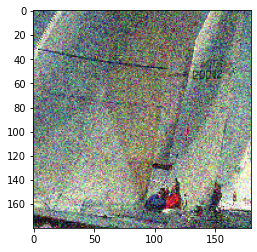

In [ ]:
plt.imshow(test2[9])

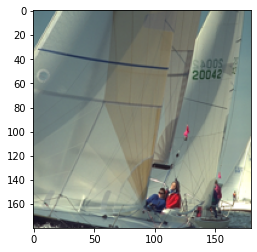

In [ ]:

test2.shape
test2clean.shape
test3.shape

plt.imshow(test2clean[9])


In [ ]:
cd ..

/content/drive/My Drive


In [ ]:
cd finalsigma

/content/drive/My Drive/finalsigma


In [ ]:

def BRDNet():
  inpt=Input(shape=(180,180,3))
  x=Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same')(inpt)
  x=BatchNormalization(axis=-1,epsilon=1e-3)(x)
  x=Activation('relu')(x)
  for i in range(7):
    x=Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same')(x)
    x=BatchNormalization(axis=-1,epsilon=1e-3)(x)
    x=Activation('relu')(x) 

  x=Conv2D(filters=3,kernel_size=(3,3),strides=(1,1),padding='same')(x)
  x=Subtract()([inpt,x])
  y=Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same')(inpt)
  y=BatchNormalization(axis=-1,epsilon=1e-3)(y)
  y=Activation('relu')(y)
  for i in range(7):
    y=Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),dilation_rate=(2,2),padding='same')(y)
    y=Activation('relu')(y) 
  y=Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same')(y)
  y=BatchNormalization(axis=-1, epsilon=1e-3)(y)
  y=Activation('relu')(y) 

  y = Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='same')(y)#gray is 1 color is 3
  y = Subtract()([inpt, y])   # input - noise
  o = concatenate([x,y],axis=-1)
  z = Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='same')(o)#gray is 1 color is 3
  z=  Subtract()([inpt, z])
  print(z.shape)
  model = Model(inpt, outputs=z)
  return model

In [ ]:
model = BRDNet()
model.summary()

(None, 180, 180, 3)
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 180, 180, 3) 0                                            
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 180, 180, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_10 (BatchNo (None, 180, 180, 64) 256         conv2d_20[0][0]                  
__________________________________________________________________________________________________
activation_17 (Activation)      (None, 180, 180, 64) 0           batch_normalization_10[0][0]     
________________________________________________________________________

In [ ]:

INIT_LR = 1e-3  # initial learning rate
BATCH_SIZE = 20
EPOCHS = 50

def PSNR(y_true, y_pred):
    max_pixel = 255.0
    return tf.image.psnr(y_true,y_pred,max_val=max_pixel)

# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss='mse',  # we train 10-way classification
    optimizer=keras.optimizers.Adamax(lr=INIT_LR),  # for SGD
     metrics=[PSNR]# report accuracy during training
)

# scheduler of learning rate (decay with epochs)
def step_decay(epoch):
    
    initial_lr = INIT_LR
    if epoch<30:   
        lr= initial_lr
    else:
        lr = initial_lr/10
    
    return lr

# callback for printing of actual learning rate used by optimizer
class LrHistory(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs={}):
        print("Learning rate:", K.get_value(model.optimizer.lr))

In [ ]:
filepath="weights-improvement-{epoch:02d}.hdf5"





last_finished_epoch = 43   
model.load_weights(filepath.format(epoch=last_finished_epoch))



In [ ]:
from skimage.measure import compare_psnr, compare_ssim,compare_mse
psnr=[]
mse=[]

for i in range(len(test1)):
  img_out=model.predict(test1[i].reshape((1,180,180,3))).astype(int)
  
  psnr.append(float(compare_psnr(test1clean[i],img_out[0],255)))
  mse.append(float(compare_mse(test1clean[i],img_out[0])))
  
print(sum(psnr)/len(psnr))
print(psnr)
print(sum(mse)/len(mse))



27.847020642993975
[26.46499358523332, 29.542502396988233, 28.223038303626183, 28.68286407663193, 29.869969555884186, 32.420055443772, 26.228115658695643, 26.93159526607098, 26.37691063330451, 30.141177743046672, 25.04900677371157, 24.978208441234774, 30.30735603693187, 27.07646612765544, 28.11640508406665, 23.816186581629637, 29.83608026324349, 28.728646511500887, 27.596729878736316, 26.367897533833048, 25.12673121526507, 23.891102553624187, 27.690982952438986, 26.2905088091727, 27.864919952885337, 25.735614490471704, 32.29762144228359, 32.91973366216426, 23.329240450215924, 27.094683158225422, 24.249632179377766, 28.25734056301237, 27.64688675906814, 29.546098178602747, 27.448545558258704, 31.73934950524918, 31.01075021160794, 26.6796296039377, 34.42200387472769, 27.203195849859352, 28.51616785778692, 27.871671392071438, 29.358997489924473, 26.761903669906207, 34.961232018406605, 25.354555617183966, 26.203743569853817, 28.43588229882133, 34.99742688580879, 28.91793089767286, 25.35857

In [ ]:
psnr=[]
mse=[]
ssim=[]
for i in range(len(test2)):
  img_out=model.predict(test2[i].reshape((1,180,180,3))).astype(int)
  
  psnr.append(float(compare_psnr(test2clean[i],img_out[0],255)))
  mse.append(float(compare_mse(test2clean[i],img_out[0])))
 
print(sum(psnr)/len(psnr))
print(psnr)
print(sum(mse)/len(mse))


28.056499989197192
[26.003276555148314, 31.73308256271187, 29.214315316803802, 31.617579678348513, 24.606157720414636, 28.30155701869788, 32.08531216798721, 22.947262576624222, 29.01910197910596, 28.407105028803272, 26.181785136150527, 27.781432935135726, 24.60255514505102, 27.46479996025662, 27.566859902174322, 29.298643821524717, 29.751391030067722, 26.638526607682756, 26.405861117622422, 27.004543641418557, 28.323202326018198, 30.09475950997105, 31.87488693604181, 26.432001066971434]
117.9636334019204


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


28.407105028803272
93.83608024691358


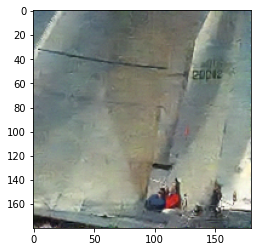

In [ ]:
img_out=model.predict(test2[9].reshape((1,180,180,3))).astype(int)
  
print(float(compare_psnr(test2clean[9],img_out[0],255))) 
print(float(compare_mse(test2clean[9],img_out[0])))

plt.imshow(img_out[0])

In [ ]:
psnr=[]
mse=[]
ssim=[]
for i in range(len(test3)):
  img_out=model.predict(test3[i].reshape((1,180,180,3))).astype(int)
  
  psnr.append(float(compare_psnr(test3clean[i],img_out[0],255)))
  mse.append(float(compare_mse(test3clean[i],img_out[0])))
print(sum(psnr)/len(psnr))
print(psnr)
print(sum(mse)/len(mse))

27.622095999934203
[25.32574848310282, 26.974197619863723, 28.532472255095797, 28.41696309051807, 32.409527165964775, 26.74826667791733, 33.043389979480786, 28.763630698730115, 25.73068869652852, 25.35949125409533, 28.78485441626726, 26.06796456012162, 25.89887835172882, 25.102952027233524, 24.280425450658626, 27.403063795645807, 30.37672201971315, 27.978491456149584]
127.86683584819386


# **Mean filter**

24.043814587029697
256.27066872427986


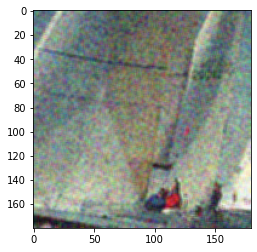

In [ ]:
import cv2
figure_size = 3 # the dimension of the x and y axis of the kernal.
new_image = cv2.blur(test2[9],(figure_size, figure_size))
plt.imshow(new_image)
print(float(compare_psnr(test2clean[9],new_image,255)))
print( float(compare_mse(test2clean[9],new_image)))

In [ ]:
psnr=[]
mse=[]
ssim=[]
for i in range(len(test1)):
  new_image = cv2.blur(test1[i],(figure_size, figure_size))
  
  psnr.append(float(compare_psnr(test1clean[i],new_image,255)))
  mse.append(float(compare_mse(test1clean[i],new_image)))
print(sum(psnr)/len(psnr))
print(psnr)
print(sum(mse)/len(mse))

24.49394179426679
[23.862479203017102, 25.47822342397418, 25.03998905489217, 26.07593910566143, 26.64640020543763, 28.427296097935585, 23.079770901470855, 24.618030791811197, 22.94663564557804, 27.272508671729838, 20.68871433526504, 23.169397696729472, 27.09530971052875, 23.011230702615414, 25.03070246888113, 20.278451343066813, 24.199997227892034, 23.297098881500233, 24.622701311978638, 22.250198971545323, 21.69541500183052, 20.43174561196299, 24.63709124407901, 22.470992374933687, 23.83263622813025, 22.59627428467326, 28.545683868100717, 27.102300488047305, 20.81169758369375, 23.947941452159263, 21.831278136616312, 24.351227579416822, 24.712568525273703, 24.691689011423662, 24.14929332777662, 30.322777621983484, 28.304328576430787, 23.70555010405159, 28.289816361425977, 22.893240082733026, 25.67675548930496, 23.883029464542687, 25.65718764416752, 23.703019158508674, 31.266618487181663, 21.708356754730218, 23.632312638277693, 23.40454362101804, 31.886431314739244, 25.725078998872597, 

In [ ]:
psnr=[]
mse=[]
ssim=[]
for i in range(len(test2)):
  new_image = cv2.blur(test2[i],(figure_size, figure_size))
  
  psnr.append(float(compare_psnr(test2clean[i],new_image,255)))
  mse.append(float(compare_mse(test2clean[i],new_image)))
print(sum(psnr)/len(psnr))
print(psnr)
print(sum(mse)/len(mse))

25.14476712523547
[24.425897168055123, 29.946068259079546, 25.04164090953642, 28.847778313371073, 22.198666207337148, 27.45855313634623, 27.0465684844486, 20.998291534167144, 24.5098497931475, 24.043814587029697, 22.722472542510104, 23.297995085562306, 23.272777869903262, 25.434081574616485, 24.05362860708335, 25.261984104006917, 27.014404748007713, 24.364443845029097, 24.130420500389572, 21.631994411211913, 26.76685137418496, 28.44085713760574, 28.803765734090888, 23.761605078930693]
228.1886432613169


In [ ]:
psnr=[]
mse=[]
ssim=[]
for i in range(len(test3)):
  new_image = cv2.blur(test3[i],(figure_size, figure_size))
  
  psnr.append(float(compare_psnr(test3clean[i],new_image,255)))
  mse.append(float(compare_mse(test3clean[i],new_image)))
print(sum(psnr)/len(psnr))
print(psnr)
print(sum(mse)/len(mse))

24.694390259069294
[23.364711783920512, 24.633434370383664, 26.08855866338295, 25.026893424732314, 28.487268195958837, 22.756991611425224, 30.51689251906199, 25.213046881418887, 25.929191977877323, 21.022699995566985, 25.820326868879274, 22.81030473967233, 21.004709428330465, 23.4372454450636, 22.776454223775595, 23.466008870662932, 27.020247686040232, 25.124037977094172]
252.4469798811157


# **Gaussian filter**

In [ ]:
cd ..

/content/drive/My Drive


In [ ]:
cd Test

/content/drive/My Drive/Test


In [ ]:
folder = "type1test/noisy"

testfilestype1 = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
psnr=[]
mse=[]
ssim=[]
for i in range(len(test1)):
  
  img=cv2.imread("type1test/noisy/"+str(testfilestype1[i]))
  
  new_image = cv2.GaussianBlur(cv2.cvtColor(img,cv2.COLOR_BGR2RGB),(figure_size, figure_size),0)
  
  psnr.append(float(compare_psnr(test1clean[i],new_image,255)))
  mse.append(float(compare_mse(test1clean[i],new_image)))
print(sum(psnr)/len(psnr))
print(psnr)
print(sum(mse)/len(mse))

25.473374606078337
[25.237161763769862, 26.119042786196204, 26.242531357964015, 26.15074938486808, 28.38721926074883, 28.86448963536811, 23.71736072490249, 26.781568252993964, 23.21785130762965, 28.218731608181884, 21.543024914768804, 23.47585287110344, 27.834377222193147, 22.88681206644904, 26.507134046883674, 21.044536993740287, 23.87458716940329, 22.840748638656535, 26.30753404974392, 22.600694916531886, 24.174324591386313, 21.05750720079233, 25.73192630791374, 23.049799392258116, 24.41201573042267, 22.615675762673245, 30.351828954061745, 27.980203183599194, 22.17755966158353, 23.86489903422394, 23.21698705397035, 26.29384313251295, 27.226527656431642, 24.491660707843984, 24.885803173370128, 31.642344577715875, 30.64548031576273, 23.683734965823202, 30.80664013156217, 23.431031570988683, 27.80003845471025, 24.34356825649187, 27.78769404486043, 24.19315897934986, 31.67081772125167, 23.150251993126048, 24.37888980163663, 26.117146826431412, 33.68608738450924, 27.672229940617253, 23.62

In [ ]:
folder = "type2test/noisy"

testfilestype2 = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
psnr=[]
mse=[]
ssim=[]
for i in range(len(test2)):
  
  img=cv2.imread("type2test/noisy/"+str(testfilestype2[i]))
  
  new_image = cv2.GaussianBlur(cv2.cvtColor(img,cv2.COLOR_BGR2RGB),(figure_size, figure_size),0)
  
  psnr.append(float(compare_psnr(test2clean[i],new_image,255)))
  mse.append(float(compare_mse(test2clean[i],new_image)))
print(sum(psnr)/len(psnr))
print(psnr)
print(sum(mse)/len(mse))

26.035582283499735
[26.06926266240038, 30.936247707353402, 24.533918222412055, 29.19282365176008, 23.350653292042033, 29.014519159668396, 29.440705304668086, 22.711287978106178, 24.931269064450948, 23.734195923875294, 22.66175872620725, 22.82725929625789, 24.31322208641963, 27.107394494915184, 23.78469915809408, 24.83859879445837, 27.634952356233875, 25.118155209706504, 26.655287783332557, 21.583532505959898, 29.041415480278804, 30.581274501361552, 30.700612295902722, 24.0909291481284]
196.0125480109739


23.734195923875294
275.2078189300411


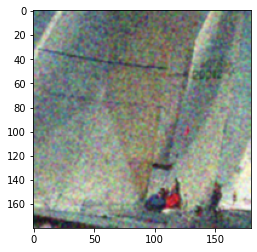

In [ ]:
img=cv2.imread("type2test/noisy/"+str(testfilestype2[9]))
  
new_image = cv2.GaussianBlur(cv2.cvtColor(img,cv2.COLOR_BGR2RGB),(figure_size, figure_size),0) 

print(float(compare_psnr(test2clean[9],new_image,255)))
print( float(compare_mse(test2clean[9],new_image)))

plt.imshow(new_image)


In [ ]:
folder = "type3test/noisy15"

testfilestype3 = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
testfilestype3=sorted(testfilestype3)
psnr=[]
mse=[]
ssim=[]
for i in range(len(test3)):
  
  img=cv2.imread("type3test/noisy/"+str(testfilestype3[i]))
  
  new_image = cv2.GaussianBlur(cv2.cvtColor(img,cv2.COLOR_BGR2RGB),(figure_size,figure_size),0)
  
  psnr.append(float(compare_psnr(test3clean[i],new_image,255)))
  mse.append(float(compare_mse(test3clean[i],new_image)))
print(sum(psnr)/len(psnr))
print(psnr)
print(sum(mse)/len(mse))

25.70409964485636
[25.751376292138826, 24.746828167338574, 26.216233372908096, 25.248296398130993, 28.88062135110703, 22.318785012692498, 31.702297651153508, 27.527415504425086, 28.105564690495424, 21.76622317894627, 27.399728849509337, 24.804128854500554, 22.70457528498425, 23.720800818750117, 22.642592542596756, 23.48896370551153, 29.433262539399934, 26.216099392825726]
207.28887917238228


# **Median filter**

In [ ]:
folder = "type1test/noisy"

testfilestype1 = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
psnr=[]
mse=[]
ssim=[]
for i in range(len(test1)):
  
  img=cv2.imread("type1test/noisy/"+str(testfilestype1[i]))
  
  new_image = cv2.medianBlur(cv2.cvtColor(img,cv2.COLOR_BGR2RGB),figure_size)
  
  psnr.append(float(compare_psnr(test1clean[i],new_image,255)))
  mse.append(float(compare_mse(test1clean[i],new_image)))
print(sum(psnr)/len(psnr))
print(psnr)
print(sum(mse)/len(mse))

23.99807633805351
[23.5827552702742, 25.585958655105003, 24.38579298505004, 24.820199952013642, 26.49119799520117, 28.052496377930925, 21.94007792134272, 23.93096887567435, 21.657380982086952, 26.414554957792753, 20.465657168780158, 21.846020054290797, 26.226332582056514, 21.60854459933922, 24.448739083175056, 19.301451263649884, 23.78263764239818, 21.733349043901207, 25.0472086727411, 21.781617348464145, 21.5507218514686, 19.71165784275937, 24.18148989982018, 22.214153080112577, 22.934524090236216, 21.210820123570766, 28.419004234986296, 28.412261512458787, 20.30570320236088, 22.56823821393642, 20.97972615549405, 24.198770585672808, 24.435444684214573, 23.667508575570274, 23.254495130032694, 29.855058187858017, 28.621696155500892, 22.21769153124911, 31.67801052218447, 22.265533327559147, 25.82175911067828, 22.874401376737037, 26.07290809356688, 22.62063565578693, 30.50537789146758, 21.143427573139718, 22.582924116734585, 23.938406680173365, 32.18103605272778, 25.447213208431112, 20.82

In [ ]:
folder = "type2test/noisy"

testfilestype2 = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
psnr=[]
mse=[]
ssim=[]
for i in range(len(test2)):
  
  img=cv2.imread("type2test/noisy/"+str(testfilestype2[i]))
  
  new_image = cv2.medianBlur(cv2.cvtColor(img,cv2.COLOR_BGR2RGB),figure_size)
  
  psnr.append(float(compare_psnr(test2clean[i],new_image,255)))
  mse.append(float(compare_mse(test2clean[i],new_image)))
print(sum(psnr)/len(psnr))
print(psnr)
print(sum(mse)/len(mse))

24.34998388843037
[23.914708151227806, 29.41762070727037, 23.555534377384625, 27.91842128766596, 21.762799063679186, 26.980865696634837, 27.29694951008544, 20.376222877427047, 23.43982469459819, 22.58720176542729, 21.348648563611512, 21.795152814631354, 22.432525371331813, 25.055571853497373, 22.619989200175258, 23.667850248167316, 26.17121688671952, 23.280789307714084, 22.980822109609775, 21.99620339135928, 26.751595482693446, 27.93864929503475, 28.477461875943717, 22.63298879043871]
277.90786051097393


22.58720176542729
358.39354938271606


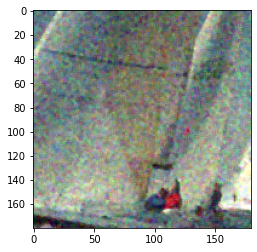

In [ ]:
img=cv2.imread("type2test/noisy/"+str(testfilestype2[9]))
  
new_image = cv2.medianBlur(cv2.cvtColor(img,cv2.COLOR_BGR2RGB),figure_size)
  
print(float(compare_psnr(test2clean[9],new_image,255)))
print(float(compare_mse(test2clean[9],new_image)))

plt.imshow(new_image)

In [ ]:
folder = "type3test/noisy15"

testfilestype3 = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
testfilestype3=sorted(testfilestype3)
psnr=[]
mse=[]
ssim=[]
for i in range(len(test3)):
  
  img=cv2.imread("type3test/noisy/"+str(testfilestype3[i]))
  
  new_image = cv2.medianBlur(cv2.cvtColor(img,cv2.COLOR_BGR2RGB),figure_size)
  
  psnr.append(float(compare_psnr(test3clean[i],new_image,255)))
  mse.append(float(compare_mse(test3clean[i],new_image)))
print(sum(psnr)/len(psnr))
print(psnr)
print(sum(mse)/len(mse))

24.322481307949577
[23.76933294999747, 23.968195126765455, 25.650040638977725, 23.96382149327675, 27.38087528240913, 21.897310189470687, 30.58599498466977, 25.3345406295985, 26.238911889620784, 21.326713034176198, 26.14425677618046, 22.38345439196842, 21.18259647789285, 22.349729385461345, 21.425782910621432, 22.56291289055493, 26.928643935015344, 24.71155055643509]
276.6314186099679


# **Bilateral Filter**

In [ ]:
folder = "type1test/noisy"

testfilestype1 = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
psnr=[]
mse=[]
ssim=[]
for i in range(len(test1)):
  
  img=cv2.imread("type1test/noisy/"+str(testfilestype1[i]))
  
  new_image = cv2.bilateralFilter(cv2.cvtColor(img,cv2.COLOR_BGR2RGB),9,75,75)
  
  psnr.append(float(compare_psnr(test1clean[i],new_image,255)))
  mse.append(float(compare_mse(test1clean[i],new_image)))
print(sum(psnr)/len(psnr))
print(psnr)
print(sum(mse)/len(mse))

25.28165468213016
[25.56905131458075, 27.06143027842296, 27.029710757356334, 25.774335267668285, 28.999293207261854, 30.228589273484026, 22.734535045717088, 26.599293758815975, 21.6749800915367, 28.822400326845298, 20.401427341406876, 21.535922094822638, 28.272913729113736, 20.345373870680366, 27.412832548142987, 18.974442121875946, 23.054930576121123, 19.91319441694896, 27.080274544864334, 21.714590438790005, 24.98145397205906, 19.09501910998858, 26.097984150878837, 22.48784840183059, 24.50696954709395, 19.860621045501695, 30.5042672324822, 29.651986023642568, 21.737622657031757, 21.909733496906977, 23.235497525124057, 27.280778232302765, 27.7444074105669, 23.662213290311918, 24.87614533060258, 32.97549793595791, 30.75815220688935, 21.857422197163416, 30.36896074652244, 22.56867441334645, 27.96067042332568, 23.95537030993447, 27.963864682361507, 23.61176177396893, 33.84567614260618, 23.584288144846433, 23.728904043236838, 27.12505007493782, 33.59812682655005, 28.38088109356943, 24.430

In [ ]:
folder = "type2test/noisy"

testfilestype2 = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
psnr=[]
mse=[]
ssim=[]
for i in range(len(test2)):
  
  img=cv2.imread("type2test/noisy/"+str(testfilestype2[i]))
  
  new_image = cv2.bilateralFilter(cv2.cvtColor(img,cv2.COLOR_BGR2RGB),9,75,75)
  
  psnr.append(float(compare_psnr(test2clean[i],new_image,255)))
  mse.append(float(compare_mse(test2clean[i],new_image)))
print(sum(psnr)/len(psnr))
print(psnr)
print(sum(mse)/len(mse))

25.50678964238912
[26.67907750891453, 31.536130553472837, 23.107910135656855, 30.622659766837046, 22.6819280724909, 29.38042034073037, 30.79829251248198, 22.430351129415705, 24.81547947701172, 21.561064463966474, 19.890198042428175, 19.923465969399096, 23.45668025881779, 27.234374541787005, 22.022118482635996, 23.58420737119976, 27.974355804760908, 25.019425248502518, 27.05238761277991, 20.424476419610066, 28.79275322405168, 29.689415847642763, 30.782129809298866, 22.7036488234458]
254.27752057613168


21.561064463966474
453.91435185185185


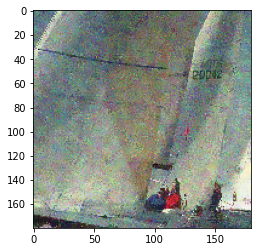

In [ ]:
img=cv2.imread("type2test/noisy/"+str(testfilestype2[9]))
  
new_image = cv2.bilateralFilter(cv2.cvtColor(img,cv2.COLOR_BGR2RGB),9,75,75)
  
print(float(compare_psnr(test2clean[9],new_image,255)))
print(float(compare_mse(test2clean[9],new_image)))

plt.imshow(new_image)


In [ ]:
folder = "type3test/noisy15"



testfilestype3 = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
testfilestype3=sorted(testfilestype3)
psnr=[]
mse=[]
ssim=[]
for i in range(len(test3)):
  
  img=cv2.imread("type3test/noisy/"+str(testfilestype3[i]))
  
  new_image = cv2.bilateralFilter(cv2.cvtColor(img,cv2.COLOR_BGR2RGB),9,75,75)
  
  psnr.append(float(compare_psnr(test3clean[i],new_image,255)))
  mse.append(float(compare_mse(test3clean[i],new_image)))

  
print(sum(psnr)/len(psnr))
print(psnr)
print(sum(mse)/len(mse))

25.456229659848912
[26.41251770872075, 24.14411706501756, 26.51045467478251, 25.070171423133225, 31.112526314957055, 19.86545526040141, 31.94983279861716, 27.630304026748412, 27.24827790218771, 20.925486753829997, 27.72201765019533, 25.267130533537294, 24.276299269862747, 22.073302013635644, 19.65440197525926, 21.807499736001613, 29.46600968489998, 27.0763290854928]
252.93367569730228
